In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/data_add_nik (1) 1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using K-Means Clustering,I created a model to form clusters or
target groups for Adidas and Nike companies so they could
target their advertisements at the focus groups better.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Q1)A)

In [ ]:
df=pd.read_csv(path)
print(df.head())

                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  
0       41  
1       24  
2       37  
3       35  
4       72  


In [ ]:
print(df.shape)

(3268, 8)


Q1)B)

In [ ]:
print(df['Product Name'].value_counts())
#Since there are 1531 unique values so there will be 1530 dummy varables which would be a lot so we need to drop this feature

Women's adidas Originals Sambarose Shoes        16
Men's adidas Originals Supercourt Shoes         16
Men's adidas Originals Stan Smith Shoes         15
Men's adidas Originals Continental 80 Shoes     14
Nike Air Max 90                                 14
                                                ..
Men's adidas Originals Superstar Clean Shoes     1
Men's adidas Running Kivaro 1 shoes              1
Men's adidas Originals Samba OG MS Shoes         1
Men's adidas Sport Inspired Strikerr             1
Nike P-6000 SE                                   1
Name: Product Name, Length: 1531, dtype: int64


In [ ]:
df=df.drop(['Product ID','Product Name'],axis=1)

Q1)C)

In [ ]:
print(df[df.duplicated()])

      Listing Price  Sale Price  Discount                     Brand  Rating  \
959            7999        3999        50          Adidas ORIGINALS     4.2   
1011           7599        4559        40          Adidas ORIGINALS     3.3   
1348           4599        4599         0         Adidas CORE / NEO     2.4   
1686           4599        2299        50         Adidas CORE / NEO     1.5   
1766           2999        2999         0  Adidas SPORT PERFORMANCE     1.5   
...             ...         ...       ...                       ...     ...   
3261          10995        8797         0                      Nike     4.4   
3263          15995       12797         0                      Nike     5.0   
3264           4995        3497         0                      Nike     0.0   
3265           8495        5947         0                      Nike     5.0   
3267           8995        6297         0                      Nike     0.0   

      Reviews  
959        25  
1011       60  
134

In [ ]:
df.drop_duplicates(keep=False, inplace=True)

Q1)D)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 3266
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Listing Price  2877 non-null   int64  
 1   Sale Price     2877 non-null   int64  
 2   Discount       2877 non-null   int64  
 3   Brand          2877 non-null   object 
 4   Rating         2877 non-null   float64
 5   Reviews        2877 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 157.3+ KB
None


In [ ]:
print(df.describe())
#Listing Price,Sale Price are right skewed as Mean>Median
#Discount is left skewed as Mean>Median

       Listing Price    Sale Price     Discount       Rating      Reviews
count    2877.000000   2877.000000  2877.000000  2877.000000  2877.000000
mean     7428.694126   5577.603406    30.298922     3.406604    45.439694
std      4406.131768   3907.063888    21.758113     1.186487    30.200332
min         0.000000    449.000000     0.000000     0.000000     0.000000
25%      4599.000000   2799.000000     0.000000     2.700000    18.000000
50%      6599.000000   4479.000000    40.000000     3.600000    45.000000
75%      8999.000000   7199.000000    50.000000     4.400000    72.000000
max     29999.000000  36500.000000    60.000000     5.000000   223.000000


Q2)A)

In [ ]:
print(df[df['Listing Price']==0.0])

      Listing Price  Sale Price  Discount Brand  Rating  Reviews
2633              0       15995         0  Nike     2.7       14
2636              0        7495         0  Nike     4.5       67
2639              0       16995         0  Nike     4.4       48
2640              0        9995         0  Nike     4.4       34
2642              0       16995         0  Nike     4.3       16
...             ...         ...       ...   ...     ...      ...
3226              0        8995         0  Nike     4.0       13
3244              0        7495         0  Nike     5.0        3
3257              0       15995         0  Nike     3.3        3
3262              0       13995         0  Nike     3.0        1
3266              0       16995         0  Nike     4.0        4

[142 rows x 6 columns]


Q2)B)

In [ ]:
print(df[df['Listing Price']==0.0].index)

Int64Index([2633, 2636, 2639, 2640, 2642, 2648, 2650, 2652, 2653, 2655,
            ...
            3216, 3217, 3221, 3222, 3224, 3226, 3244, 3257, 3262, 3266],
           dtype='int64', length=142)


In [ ]:
for i in df[df['Listing Price']==0.0].index:
  df['Listing Price']=df['Listing Price'].replace(0,df['Sale Price'][i])

Q2)C)

In [ ]:
print(df.isnull().sum())
#No missing values

Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64


Q2)D)

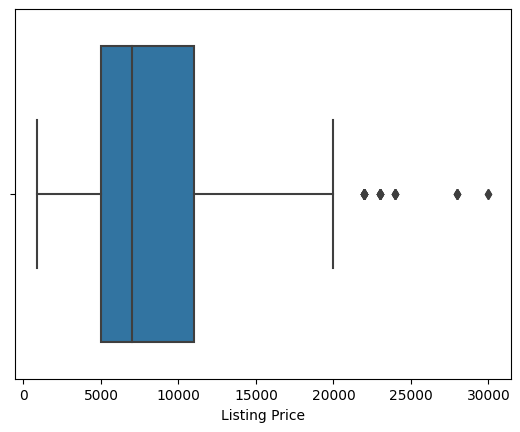

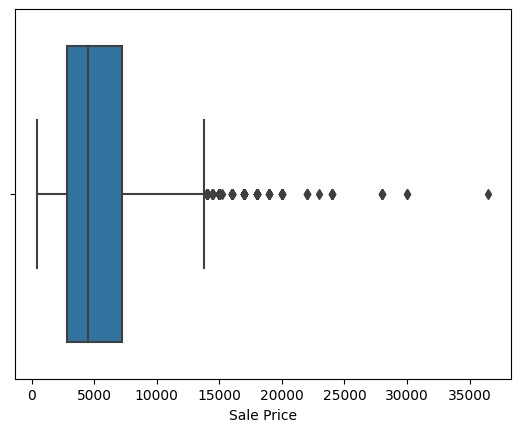

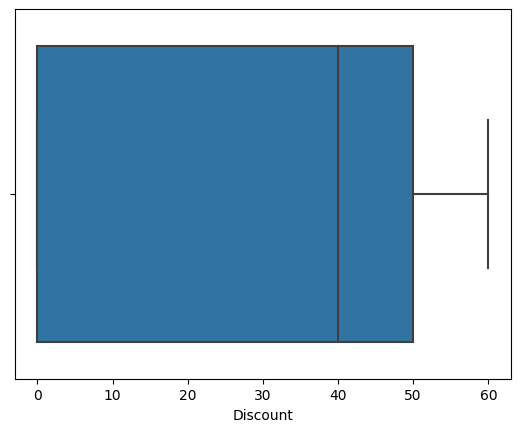

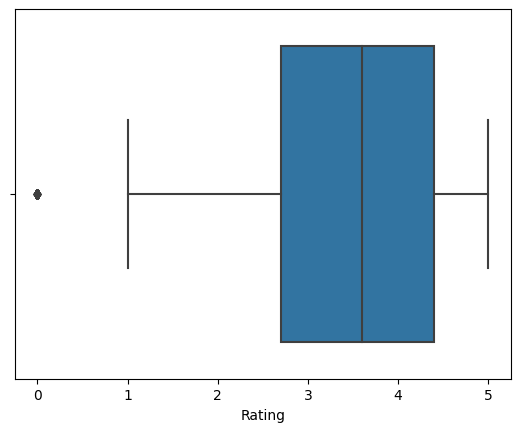

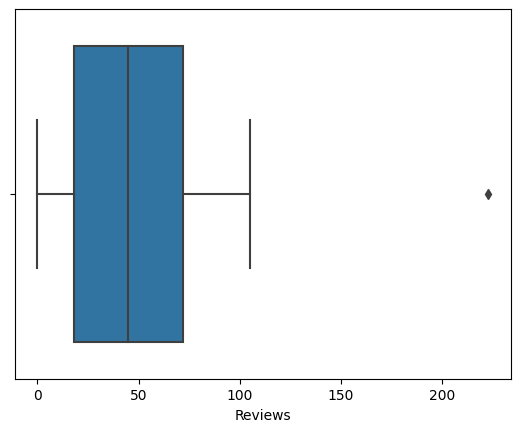

In [ ]:
df_numeric=df.select_dtypes(include='number')
for i in df_numeric.columns:
  sns.boxplot(data=df_numeric,x=df_numeric[i]);
  plt.show()
  #Listing Price,Sale Price have multiple outliers
  #Rating and Reviews only have one outlier

<Axes: xlabel='Brand'>

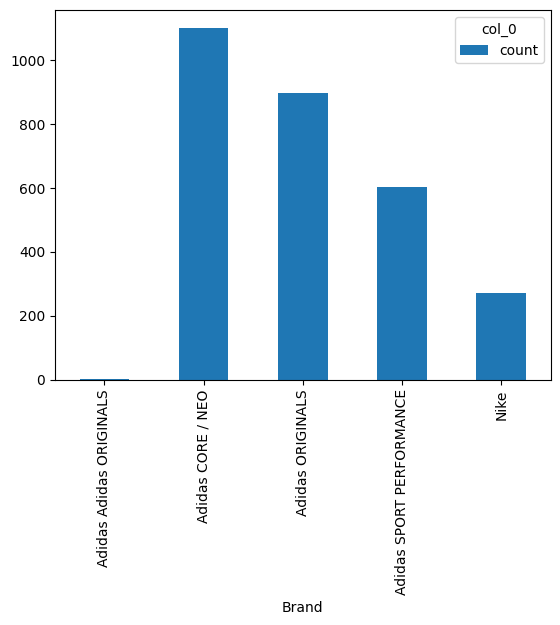

In [ ]:
my_tab = pd.crosstab(index = df['Brand'],
                              columns="count");
my_tab.plot.bar()
#Adidas Adidas ORIGINALS needs to be named as Adidas ORIGINALS

In [ ]:
df['Brand']=df['Brand'].replace('Adidas Adidas ORIGINALS','Adidas ORIGINALS')

<Axes: xlabel='Brand'>

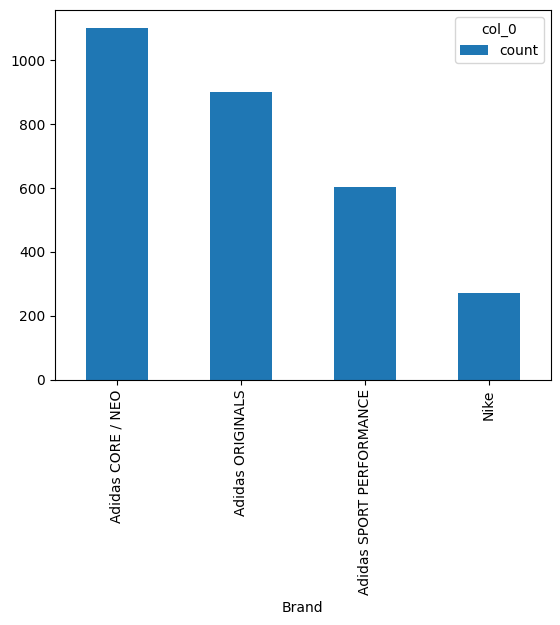

In [ ]:
my_tab = pd.crosstab(index = df['Brand'],
                              columns="count");
my_tab.plot.bar()

Q2)E)

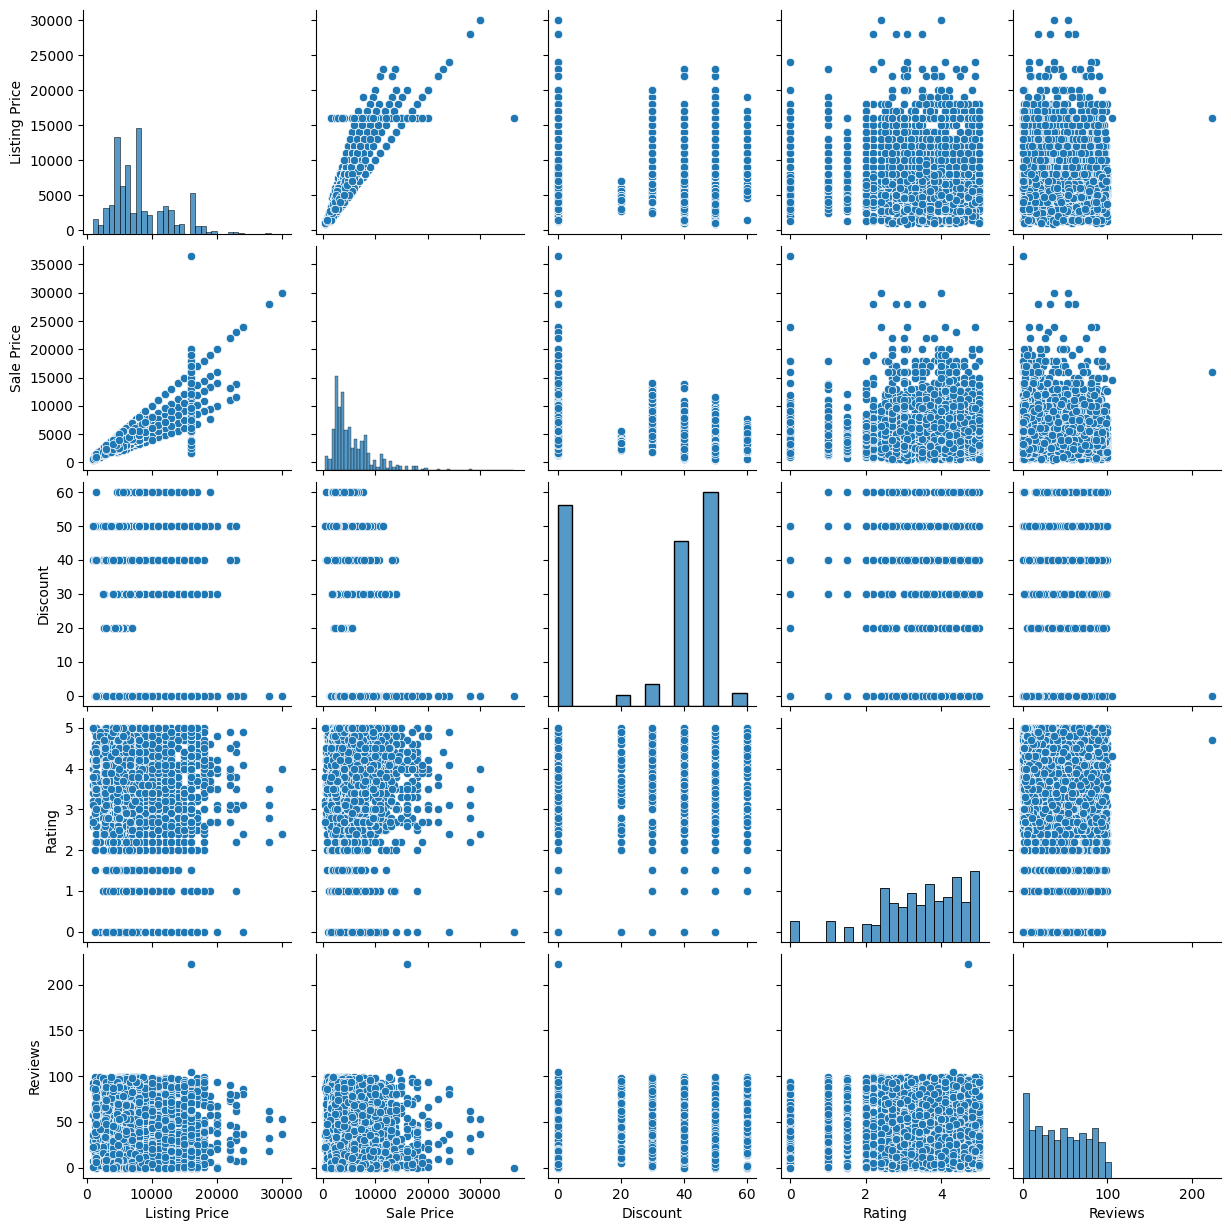

In [ ]:
sns.pairplot(data=df);
#Sale Price and Listing Price have positive correlation while other columns have no correlation with each other

In [ ]:
df_numeric.isnull().sum()

Listing Price    0
Sale Price       0
Discount         0
Rating           0
Reviews          0
dtype: int64

Q3)A)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(scaled,
                                 columns = df_numeric.columns)
df_numeric_scaled.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,1.528438,0.491861,0.905616,1.174592,-0.147034
1,-0.139562,-0.455307,0.905616,-0.089864,-0.710039
2,-1.627237,-1.274478,0.445938,-0.679944,-0.279506
3,-0.274805,-0.532104,0.905616,0.584512,-0.345742
4,-0.049400,-0.404109,0.905616,0.078730,0.879624


In [ ]:
df_numeric_scaled=pd.concat([df_numeric_scaled,df['Brand']],axis=1)
df_numeric_scaled.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Brand
0,1.528438,0.491861,0.905616,1.174592,-0.147034,Adidas ORIGINALS
1,-0.139562,-0.455307,0.905616,-0.089864,-0.710039,Adidas ORIGINALS
2,-1.627237,-1.274478,0.445938,-0.679944,-0.279506,Adidas CORE / NEO
3,-0.274805,-0.532104,0.905616,0.584512,-0.345742,Adidas CORE / NEO
4,-0.049400,-0.404109,0.905616,0.078730,0.879624,Adidas ORIGINALS


Q4)A)

In [ ]:
df_numeric_scaled=pd.get_dummies(df_numeric_scaled,drop_first=True)
df_numeric_scaled.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Adidas ORIGINALS,Brand_Adidas SPORT PERFORMANCE,Brand_Nike
0,1.528438,0.491861,0.905616,1.174592,-0.147034,1,0,0
1,-0.139562,-0.455307,0.905616,-0.089864,-0.710039,1,0,0
2,-1.627237,-1.274478,0.445938,-0.679944,-0.279506,0,0,0
3,-0.274805,-0.532104,0.905616,0.584512,-0.345742,0,0,0
4,-0.049400,-0.404109,0.905616,0.078730,0.879624,1,0,0


In [ ]:
df_numeric_scaled.isnull().sum()

Listing Price                     166
Sale Price                        166
Discount                          166
Rating                            166
Reviews                           166
Brand_Adidas ORIGINALS              0
Brand_Adidas SPORT PERFORMANCE      0
Brand_Nike                          0
dtype: int64

In [ ]:
df_numeric_scaled['Listing Price']=df_numeric_scaled['Listing Price'].fillna(df_numeric_scaled['Listing Price'].median())
df_numeric_scaled['Sale Price']=df_numeric_scaled['Sale Price'].fillna(df_numeric_scaled['Sale Price'].median())
df_numeric_scaled['Discount']=df_numeric_scaled['Discount'].fillna(df_numeric_scaled['Discount'].mean())
df_numeric_scaled['Rating']=df_numeric_scaled['Rating'].fillna(df_numeric_scaled['Rating'].mean())
df_numeric_scaled['Reviews']=df_numeric_scaled['Reviews'].fillna(df_numeric_scaled['Reviews'].mean())

In [ ]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043 entries, 0 to 3266
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Listing Price                   3043 non-null   float64
 1   Sale Price                      3043 non-null   float64
 2   Discount                        3043 non-null   float64
 3   Rating                          3043 non-null   float64
 4   Reviews                         3043 non-null   float64
 5   Brand_Adidas ORIGINALS          3043 non-null   uint8  
 6   Brand_Adidas SPORT PERFORMANCE  3043 non-null   uint8  
 7   Brand_Nike                      3043 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 151.6 KB


In [ ]:
df_numeric_scaled['Listing Price'].value_counts()

-0.049400    327
-0.274805    255
-0.500210    212
-0.725616    185
-0.590373    176
            ... 
 2.654563      1
-1.649778      1
-1.582156      1
-0.838318      1
 0.287807      1
Name: Listing Price, Length: 77, dtype: int64

In [ ]:
df_numeric_scaled['Listing Price']=df_numeric_scaled['Listing Price'].astype(float)
df_numeric_scaled['Sale Price']=df_numeric_scaled['Sale Price'].astype(float)
df_numeric_scaled['Discount']=df_numeric_scaled['Discount'].astype(float)
df_numeric_scaled['Rating']=df_numeric_scaled['Rating'].astype(float)
df_numeric_scaled['Reviews']=df_numeric_scaled['Reviews'].astype(float)

Q4)B)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

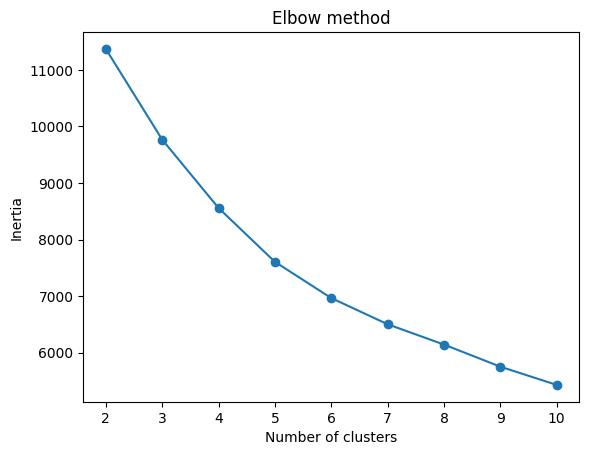

In [ ]:
inertias=[]
silhouette_scores=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(df_numeric_scaled)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_numeric_scaled, kmeans.labels_, metric='euclidean'))
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Q4)C)

In [ ]:
#Optimal clusters would be 5-7

Q4)D)

In [ ]:
for i in range(0,len(silhouette_scores)):
  print("No of Clusters: ",i+2)
  print("Silhouette Score: ",silhouette_scores[i])

No of Clusters:  2
Silhouette Score:  0.315420040795735
No of Clusters:  3
Silhouette Score:  0.2551129467939036
No of Clusters:  4
Silhouette Score:  0.20301974458984123
No of Clusters:  5
Silhouette Score:  0.21016559757262235
No of Clusters:  6
Silhouette Score:  0.21764818529498628
No of Clusters:  7
Silhouette Score:  0.21611236313672005
No of Clusters:  8
Silhouette Score:  0.2167161669630222
No of Clusters:  9
Silhouette Score:  0.2039846667022571
No of Clusters:  10
Silhouette Score:  0.21604569175807306


Q4)E)

In [ ]:
#Optimal value of k is 5

Q4)F)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_numeric_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q4)G)

In [ ]:
df_numeric_scaled['Cluster']=kmeans.labels_
df_numeric_scaled.head()

,Listing Price,Sale Price,Discount,Rating,Reviews,Brand_Adidas ORIGINALS,Brand_Adidas SPORT PERFORMANCE,Brand_Nike,Cluster
0,1.528438,0.491861,0.905616,1.174592,-0.147034,1,0,0,3
1,-0.139562,-0.455307,0.905616,-0.089864,-0.710039,1,0,0,3
2,-1.627237,-1.274478,0.445938,-0.679944,-0.279506,0,0,0,3
3,-0.274805,-0.532104,0.905616,0.584512,-0.345742,0,0,0,3
4,-0.049400,-0.404109,0.905616,0.078730,0.879624,1,0,0,1
